# Load Dataset From Kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abdullah0a/student-dropout-analysis-and-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/abdullah0a/student-dropout-analysis-and-prediction-dataset
License(s): MIT
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 23.2MB/s]


In [ ]:
!unzip student-dropout-analysis-and-prediction-dataset.zip

Archive:  student-dropout-analysis-and-prediction-dataset.zip
  inflating: student dropout.csv     


# Exploratory Data Analysis

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/student-dropout-analysis-and-prediction-dataset.zip")

FileNotFoundError: [Errno 2] No such file or directory: '/content/student-dropout-analysis-and-prediction-dataset.zip'

In [ ]:
df.head()

NameError: name 'df' is not defined

**Column Descriptions:**


1. **School:** Name of the school attended (e.g., MS)
2. **Gender:** M for Male, F for Female
3. **Age:** Age of the student
4. **Address:** Residence (U for urban, R for rural)
5. **Family_Size:** GT3=greater than 3, LE3=less than or equal to 3
6. **Parental_Status:** A for living together, T for living apart
7. **Mother_Education:** Education level of the mother (0 to 4).
8. **Father_Education:** Education level of the father (0 to 4).
9. **Mother_Job:** Type of job held by the mother.
10. **Father_Job:** Type of job held by the father.
11. **Reason_for_Choosing_School:** Reason for selecting the school
12. **Guardian:** Guardian of the student (e.g., mother).
13. **Travel_Time:** Time taken to travel to school (in minutes).
14. **Study_Time:** Weekly study hours (1 to 4).
15. **Number_of_Failures:** Number of past class failures.
16. **School_Support:** Whether the student receives educational support (yes/no).
17. **Family_Support:** Family provided educational support (yes/no).
18. **Extra_Paid_Class:** Participation in extra paid classes (yes/no).
19. **Extra_Curricular_Activities:** Involvement in extracurricular activities (yes/no).
20. **Attended_Nursery:** Attendance in nursery school (yes/no).
21. **Wants_Higher_Education:** Desire to pursue higher education (yes/no).
22. **Internet_Access:** Availability of internet at home (yes/no).
23. **In_Relationship:** Romantic relationship status (yes/no).
24. **Family_Relationship:** Quality of family relationships (scale 1 to 5).
25. **Free_Time:** Amount of free time after school (scale 1 to 5).
26. **Going_Out:** Frequency of going out with friends (scale 1 to 5).
27. **Weekend_Alcohol_Consumption:** Alcohol consumption on weekends (scale 1 to 5).
28. **Weekday_Alcohol_Consumption:** Alcohol consumption on weekdays (scale 1 to 5).
29. **Health_Status:** Health rating of the student (scale 1 to 5).
30. **Number_of_Absences:** Total number of absences from school.
31. **Grade_1:** Grade received in the first assessment.
32. **Grade_2:** Grade received in the second assessment.
33. **Final_Grade:** Final grade received (G3).
34. **Dropped_Out:** Whether the student has dropped out (True/False).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [ ]:
df.isna().sum()

,0
School,0
Gender,0
Age,0
Address,0
Family_Size,0
Parental_Status,0
Mother_Education,0
Father_Education,0
Mother_Job,0
Father_Job,0


There are no null or missing values in the dataset

In [ ]:
df.shape

(649, 34)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
644,False
645,False
646,False
647,False


In [ ]:
df.describe(include='all')

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,NaN
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,NaN



Numerical columns: Index(['Age', 'Mother_Education', 'Father_Education', 'Travel_Time',
       'Study_Time', 'Number_of_Failures', 'Family_Relationship', 'Free_Time',
       'Going_Out', 'Weekend_Alcohol_Consumption',
       'Weekday_Alcohol_Consumption', 'Health_Status', 'Number_of_Absences',
       'Grade_1', 'Grade_2', 'Final_Grade'],
      dtype='object')


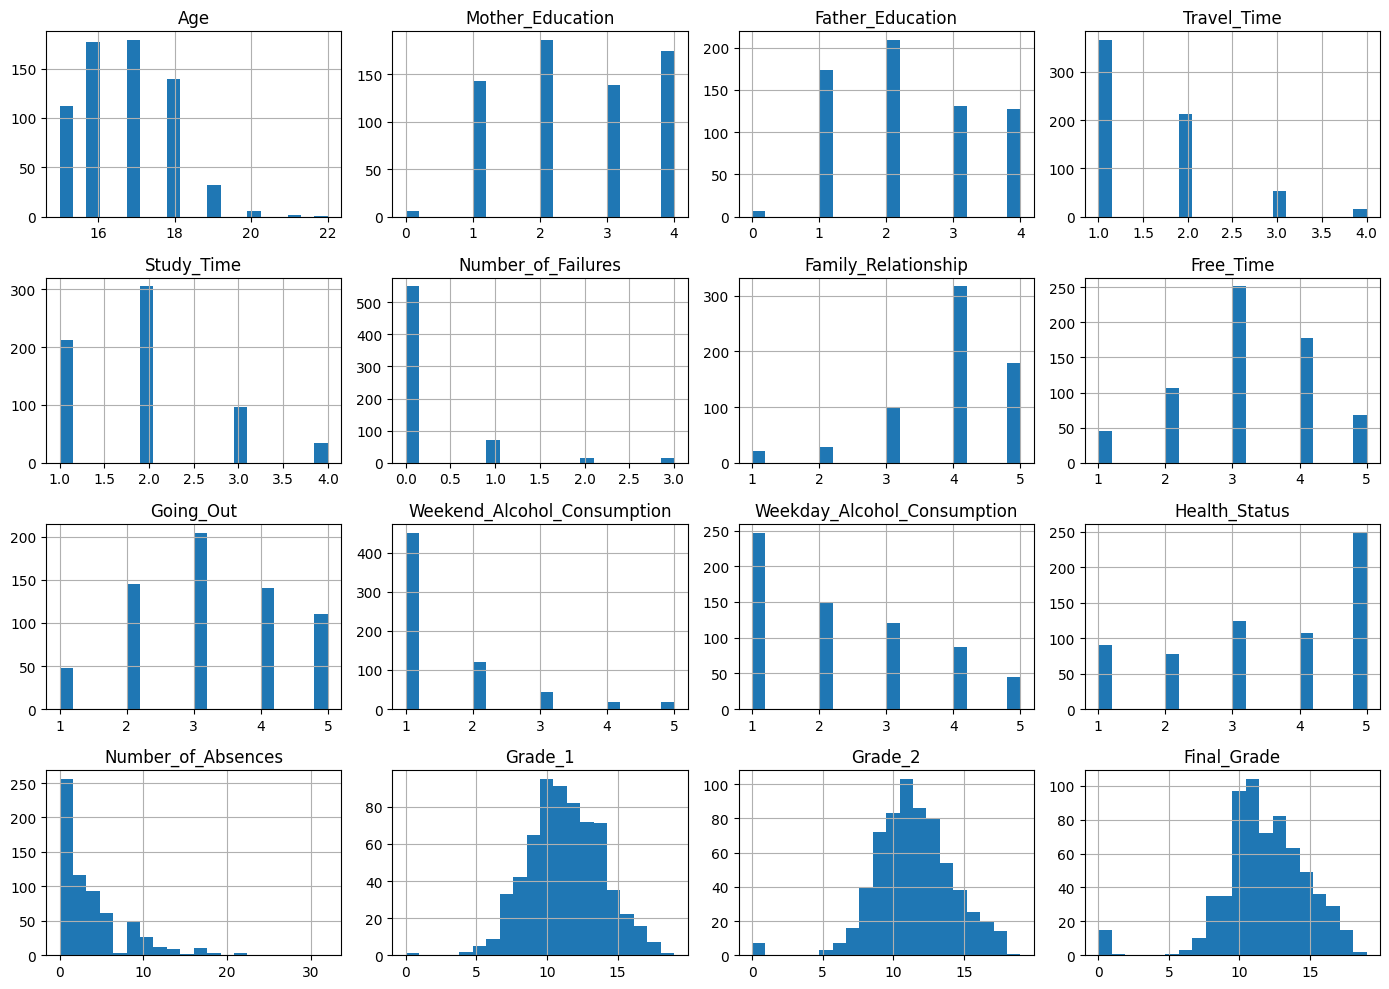

In [ ]:
numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical columns:", numerical_columns)

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


Categorical columns: Index(['School', 'Gender', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian',
       'School_Support', 'Family_Support', 'Extra_Paid_Class',
       'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship'],
      dtype='object')


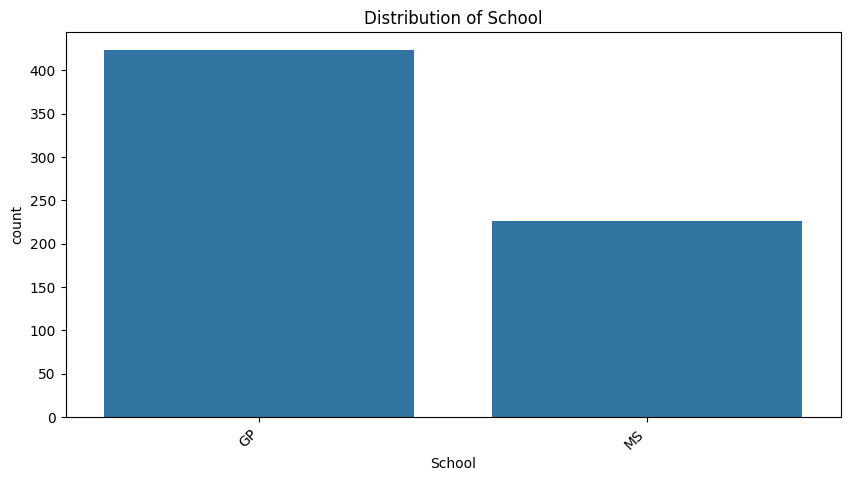

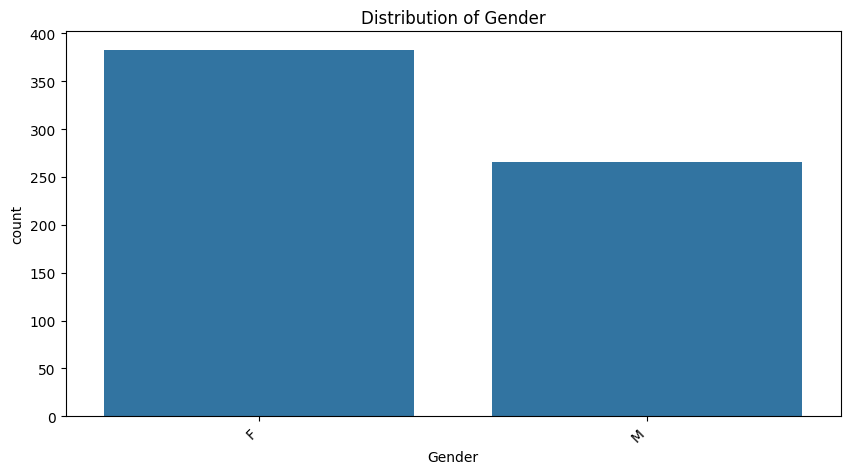

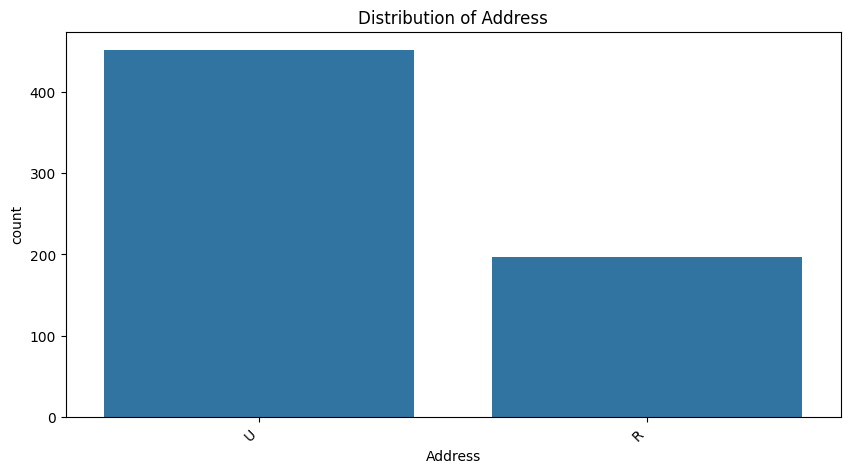

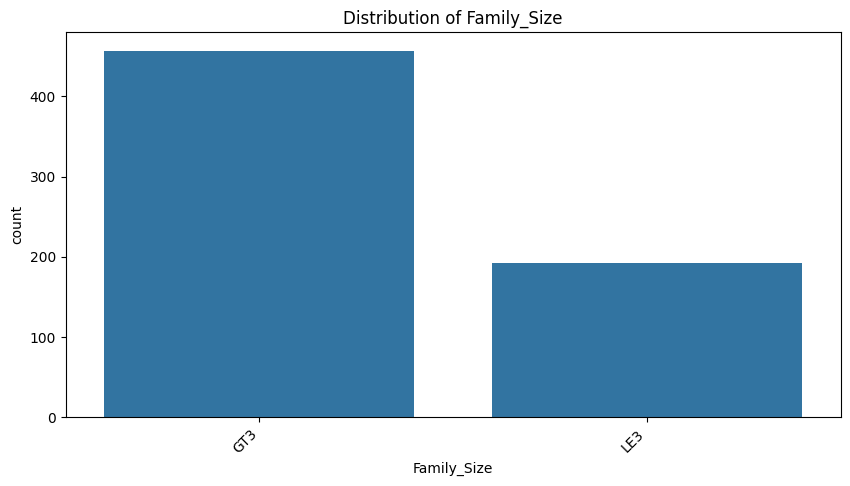

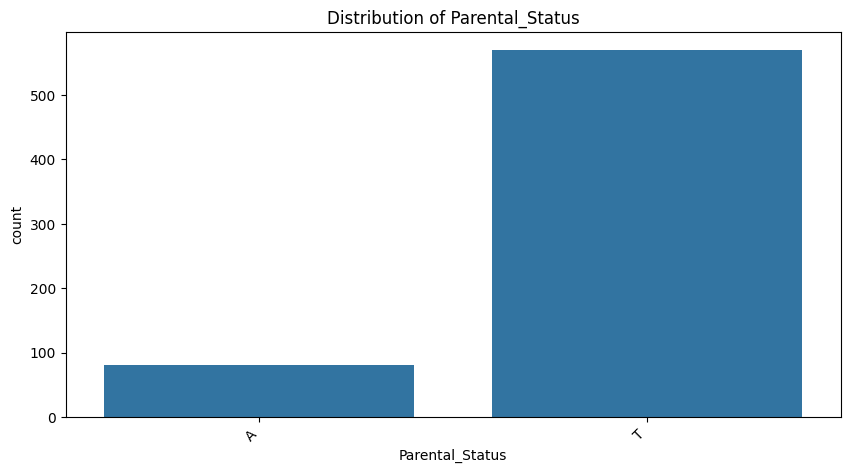

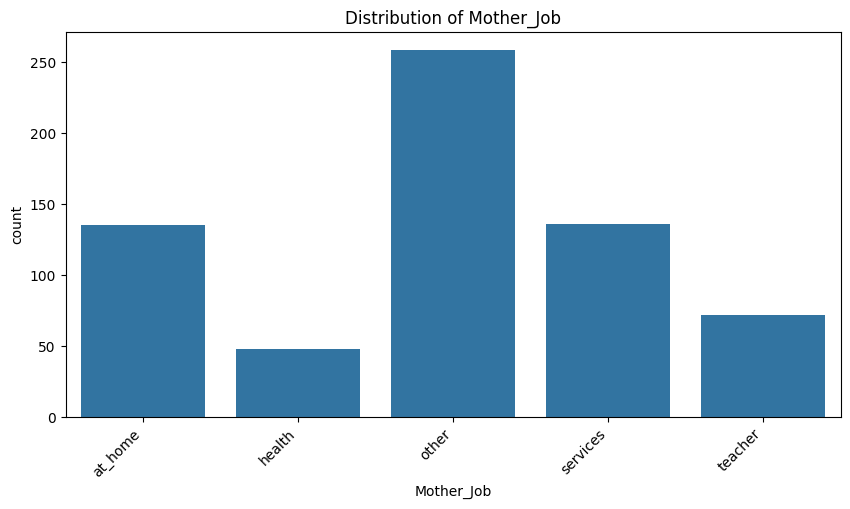

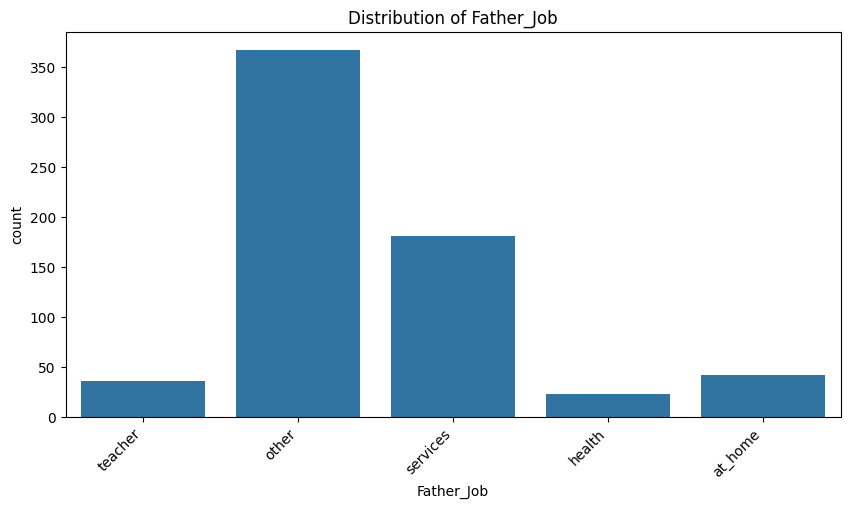

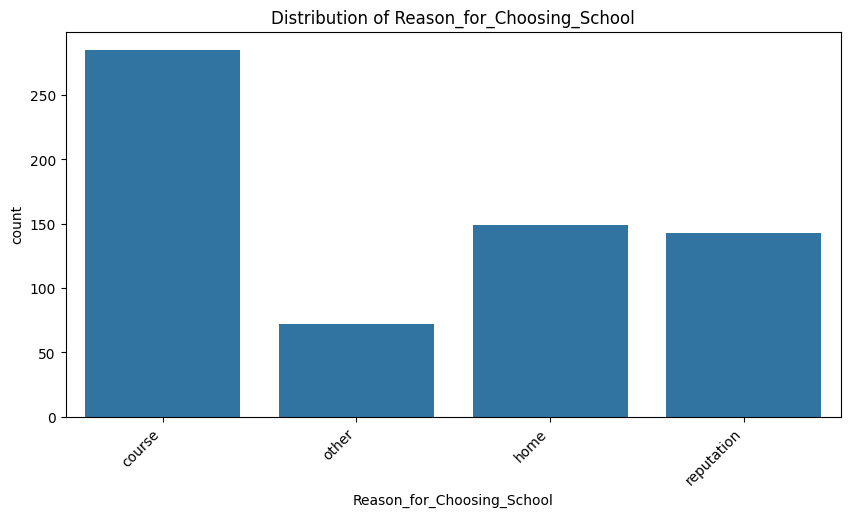

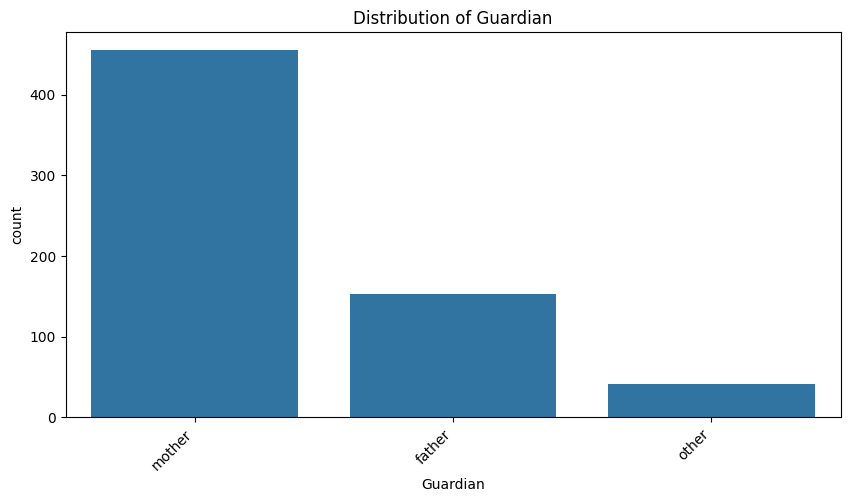

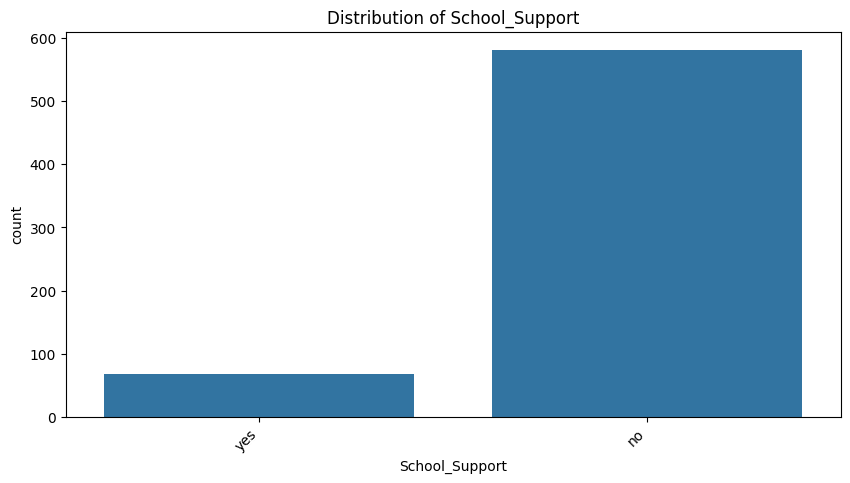

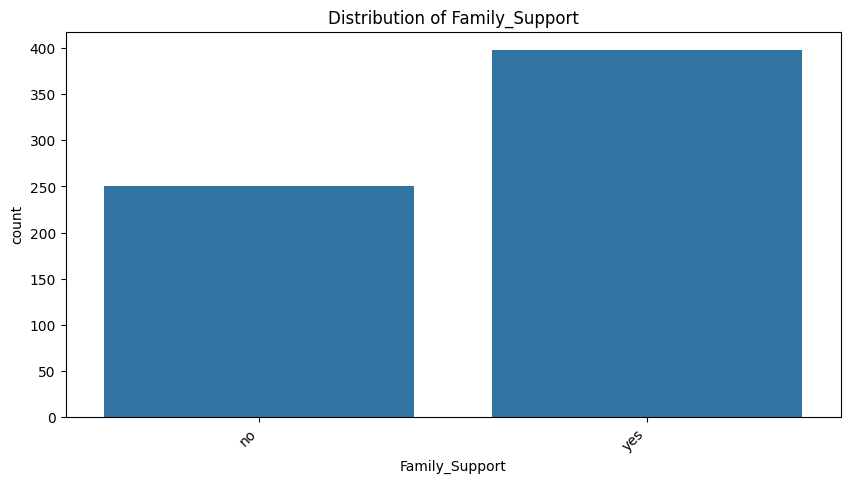

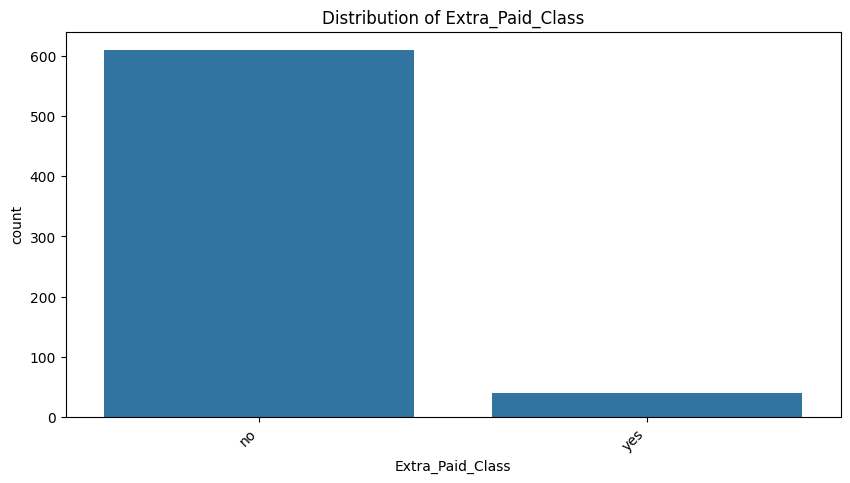

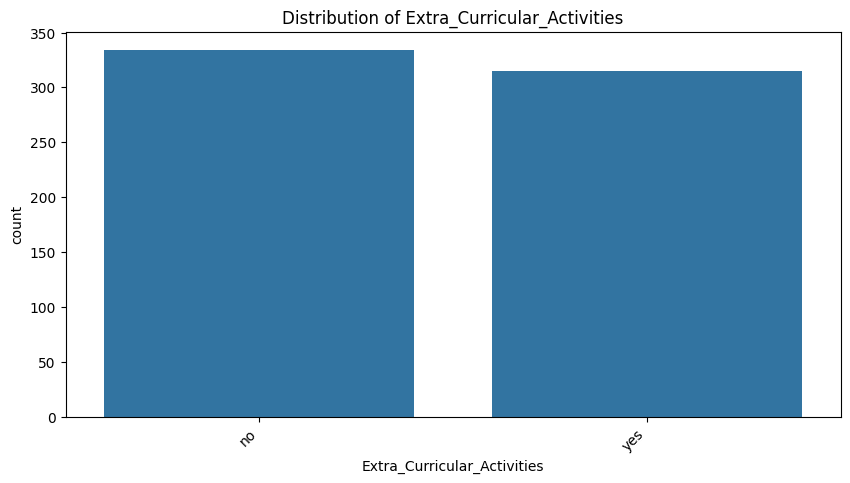

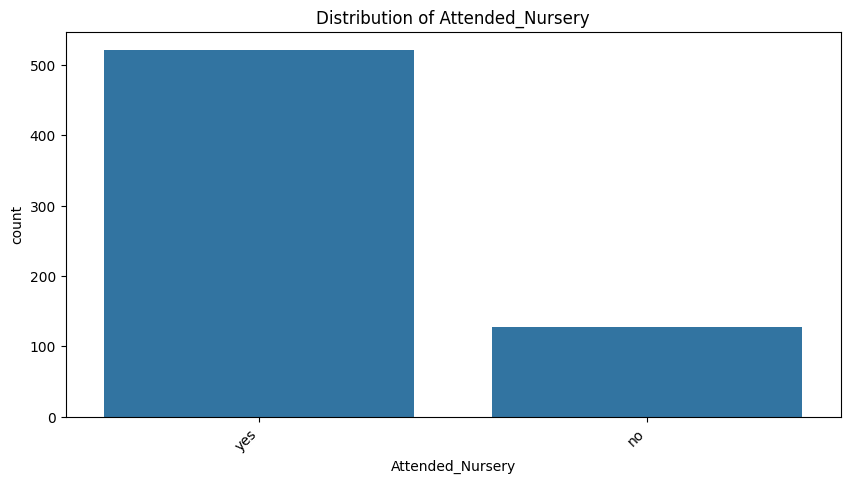

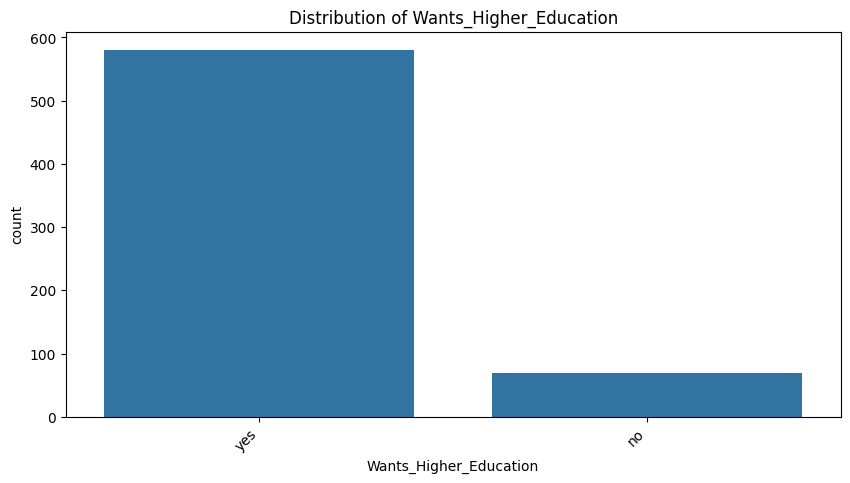

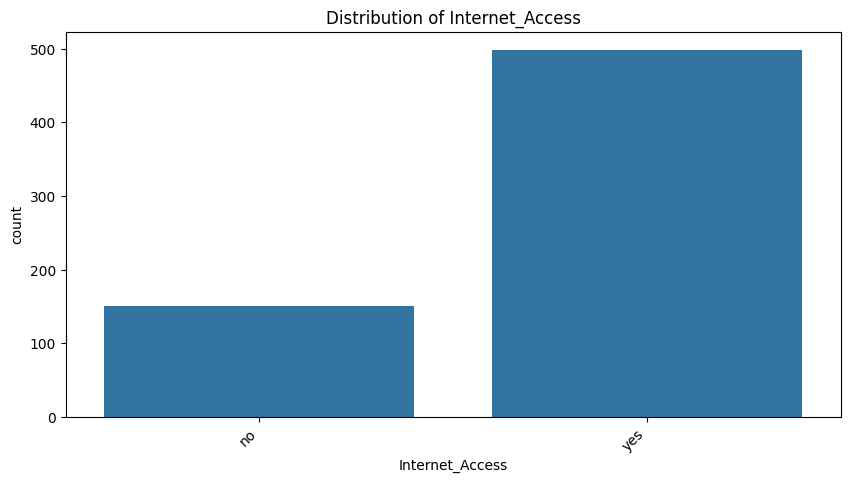

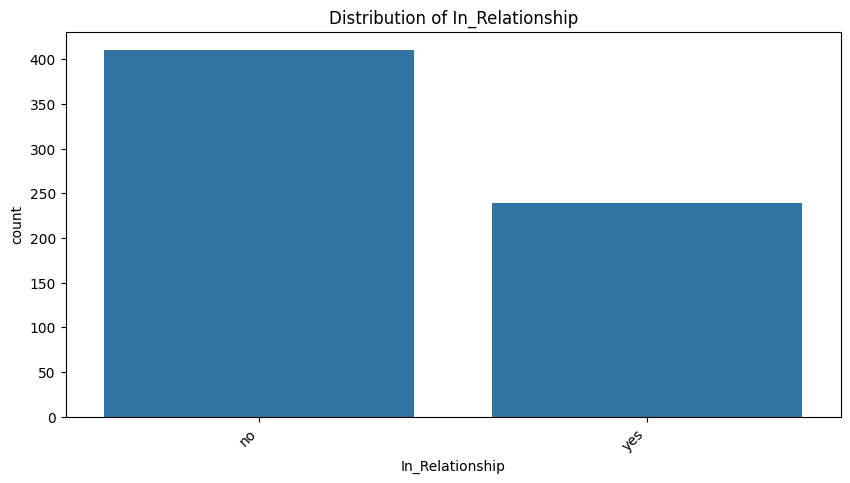

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_columns)

# Plot bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
# for col in numerical_columns:
#     plt.figure(figsize=(10, 5))
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot for {col}')
#     plt.show()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust the figure size

# Flatten axes if there are multiple rows
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])  # Use axes[i] for each subplot
    axes[i].set_title(f'Boxplot for {col}')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined


Correlation Matrix:
                                  Age  Mother_Education  Father_Education  \
Age                          1.000000         -0.107832         -0.121050   
Mother_Education            -0.107832          1.000000          0.647477   
Father_Education            -0.121050          0.647477          1.000000   
Travel_Time                  0.034490         -0.265079         -0.208288   
Study_Time                  -0.008415          0.097006          0.050400   
Number_of_Failures           0.319968         -0.172210         -0.165915   
Family_Relationship         -0.020559          0.024421          0.020256   
Free_Time                   -0.004910         -0.019686          0.006841   
Going_Out                    0.112805          0.009536          0.027690   
Weekend_Alcohol_Consumption  0.134768         -0.007018          0.000061   
Weekday_Alcohol_Consumption  0.086357         -0.019766          0.038445   
Health_Status               -0.008750          0.004614

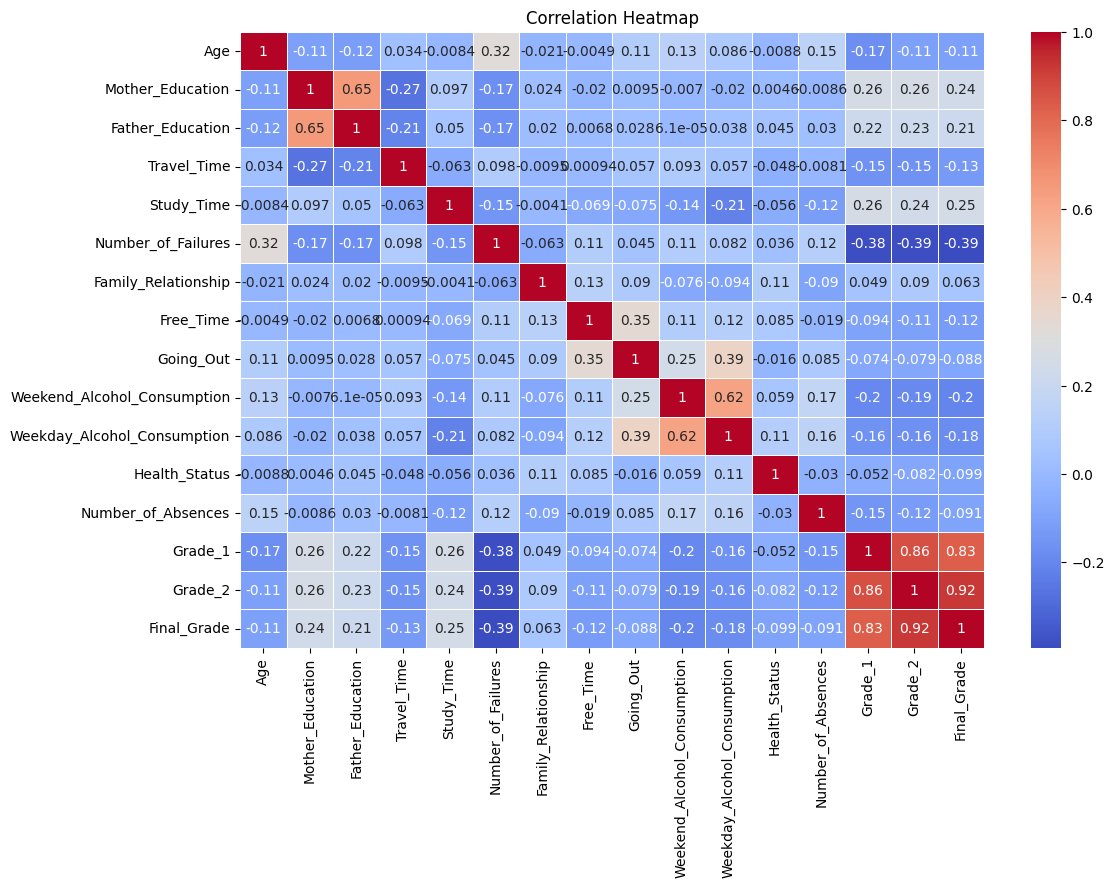

In [ ]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['Dropped_Out'].value_counts()

,count
Dropped_Out,
False,549
True,100


# Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df_true = df[df['Dropped_Out'] == True]
df_false = df[df['Dropped_Out'] == False]

In [ ]:
min_count = min(len(df_true), len(df_false))
min_count

100

In [ ]:
df_balanced = pd.concat([df_true.sample(min_count), df_false.sample(min_count)])

In [ ]:
df_balanced

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
572,MS,F,16,U,GT3,A,3,2,services,at_home,...,5,5,1,1,1,8,5,5,7,True
640,MS,M,18,R,GT3,T,4,2,other,other,...,4,3,4,3,3,0,7,7,0,True
125,GP,M,15,U,GT3,T,3,4,services,services,...,5,5,3,2,5,2,9,9,9,True
494,MS,F,16,R,LE3,T,1,2,at_home,other,...,4,5,1,3,3,0,8,9,9,True
563,MS,M,17,U,GT3,T,2,2,other,other,...,2,1,2,3,5,0,7,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,GP,F,16,U,LE3,T,2,4,other,health,...,2,2,1,2,5,2,14,12,13,False
202,GP,F,17,U,GT3,A,3,3,health,other,...,3,3,1,3,3,10,12,13,14,False
64,GP,F,15,U,LE3,T,4,3,services,services,...,4,4,2,4,2,0,13,12,12,False
259,GP,F,17,U,LE3,T,1,1,at_home,at_home,...,3,2,1,2,4,10,11,10,10,False


In [ ]:
X = df_balanced.drop(columns=['Dropped_Out'])
y = df_balanced['Dropped_Out']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
print(f'Train size: {len(X_train)}, Test size: {len(X_test)}')

Train size: 140, Test size: 60


# Logistic Regression

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000)

In [ ]:
# 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)

In [ ]:
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f'5-Fold Cross-Validation Accuracy: {cv_scores.mean()}')

5-Fold Cross-Validation Accuracy: 0.9642857142857142


In [ ]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg_model.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 1.0


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[30  0]
 [ 0 30]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        30
        True       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Linear Regression on Highly Correlated Columns

In [ ]:
df_encoded = pd.get_dummies(df_balanced, drop_first=True)

In [ ]:
corr_matrix = df_encoded.corr()

In [ ]:
high_corr_features = corr_matrix[abs(corr_matrix['Dropped_Out']) > 0.6].index.tolist()
high_corr_features.remove('Dropped_Out')

In [ ]:
print(f'Features with correlation > 0.6 with Dropped_Out: {high_corr_features}')

Features with correlation > 0.6 with Dropped_Out: ['Grade_1', 'Grade_2', 'Final_Grade']


In [ ]:
X_high_corr = df_balanced[high_corr_features]

In [ ]:
X_high_corr = pd.get_dummies(X_high_corr, drop_first=True)

In [ ]:
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_corr, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
log_reg_high_corr = LogisticRegression(max_iter=1000)

In [ ]:
cv_scores_high = cross_val_score(log_reg_high_corr, X_train_high, y_train_high, cv=cv, scoring='accuracy')
print(f'High-Correlation Features 5-Fold Cross-Validation Accuracy: {cv_scores_high.mean()}')

High-Correlation Features 5-Fold Cross-Validation Accuracy: 0.9928571428571429


In [ ]:
log_reg_high_corr.fit(X_train_high, y_train_high)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_high = log_reg_high_corr.predict(X_test_high)

In [ ]:
test_accuracy_high = accuracy_score(y_test_high, y_pred_high)
print(f'High-Correlation Features Test Accuracy: {test_accuracy_high}')

High-Correlation Features Test Accuracy: 0.9833333333333333


In [ ]:
print("\nConfusion Matrix (High-Correlation Features):")
print(confusion_matrix(y_test_high, y_pred_high))


Confusion Matrix (High-Correlation Features):
[[29  1]
 [ 0 30]]


In [ ]:
print("\nClassification Report (High-Correlation Features):")
print(classification_report(y_test_high, y_pred_high))


Classification Report (High-Correlation Features):
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        30
        True       0.97      1.00      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

